# Video: Polynomial Gradients and Linear Regressions

This video illustrates the connections between polynomial gradients and linear regressions, foreshadowing how we will analytically solve linear regression problems.

Script:
* Our coverage of gradients has been leading up to analytically solving linear regressions.
* I will now sketch out how we will derive that analytical solution from polynomial gradients.
* I will show you how to do this for the simple case of $y=mx+b$, but the technique will generalize to more variables.

## Sample Data for Regression


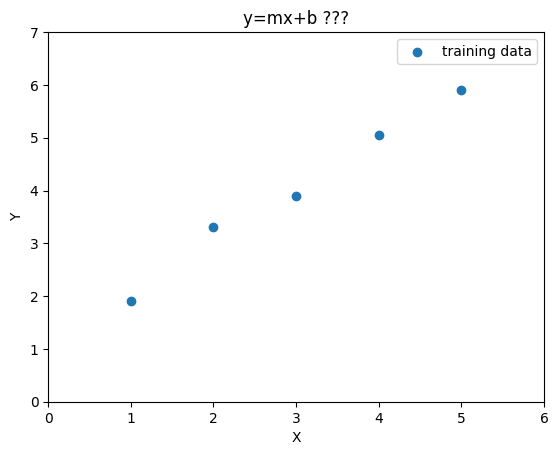

In [ ]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.9, 3.3, 3.9, 5.05, 5.9])

plt.scatter(X, Y, label="training data")
plt.xlabel("X")
plt.xlim(0, 6)
plt.ylabel("Y")
plt.ylim(0, 7)
plt.legend()
plt.title("y=mx+b ???")
plt.show();

Script:
* As always, we will start with the data and the equation for the line.

## Sample Data for Regression


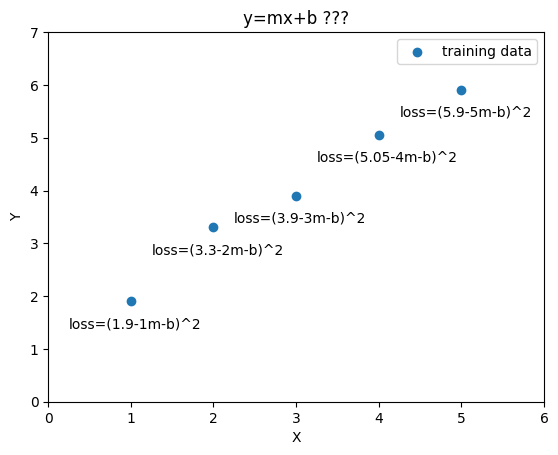

In [ ]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.9, 3.3, 3.9, 5.05, 5.9])

plt.scatter(X, Y, label="training data")
plt.xlabel("X")
plt.xlim(0, 6)
plt.ylabel("Y")
plt.ylim(0, 7)
plt.legend()
plt.title("y=mx+b ???")

for i in range(len(X)):
    plt.annotate(f"loss=({Y[i]}-{X[i]}m-b)^2", (X[i] - 0.75, Y[i] - 0.5))

plt.show();

Script:
* Starting from our input data, we can write down a formula for the loss function by computing the loss for each data point and adding the individual losses together.

## Total Loss over All Points

\begin{array}{rcl}
\mathrm{Loss} & = & \sum_i \left(y_i - (m x_i + b) \right)^2
\end{array}

Script:
* Now we will do some algebra separating out our model parameters $m$ and $b$ from the input data.
* $m$ and $b$ are the variables we will be analyzing to solve this regression.

## Total Loss over All Points

\begin{array}{rcl}
\mathrm{Loss} & = & \sum_i \left(y_i - (m x_i + b) \right)^2 \\
& = & \sum_i \left( y_i^2 - 2 y_i m x_i - 2 y_i b + m^2 x_i^2 + 2 m b x_i + b^2 \right)
\end{array}

Script:
* First, we will flatten out that outer squaring.
* That expands the number of terms in the summation quite a bit.

## Total Loss over All Points

\begin{array}{rcl}
\mathrm{Loss} & = & \sum_i \left(y_i - (m x_i + b) \right)^2 \\
& = & \sum_i \left( y_i^2 - 2 y_i m x_i - 2 y_i b + m^2 x_i^2 + 2 m b x_i + b^2 \right) \\
& = & \sum_i \left( \left(x_i^2 \right) m^2 + \left(2 x_i \right) m b + \left(- 2 y_i x_i \right) m + \left( -2 y_i \right) b + \left(1 - 2 y_i \right) b^2 \right)
\end{array}

Script:
* Next, rewrite that a bit to separate aout the $m$'s and $b$'s.
* There are a lot of parenthesises here, but it really is just regrouping everything.

## Total Loss over All Points

\begin{array}{rcl}
\mathrm{Loss} & = & \sum_i \left(y_i - (m x_i + b) \right)^2 \\
& = & \sum_i \left( y_i^2 - 2 y_i m x_i - 2 y_i b + m^2 x_i^2 + 2 m b x_i + b^2 \right) \\
& = & \sum_i \left( \left(x_i^2 \right) m^2 + \left(2 x_i \right) m b + \left(- 2 y_i x_i \right) m + \left( -2 y_i \right) b + \left(1 - 2 y_i \right) b^2 \right) \\
& = & \left( \sum_i x_i^2 \right) m^2 + \left(\sum_i 2 x_i \right) m b + \left( \sum_i - 2 y_i x_i \right) m + \left(\sum_i  -2 y_i \right) b + \left( \sum_i 1 - 2 y_i \right) b^2 \\
\end{array}

Script:
* And now, distribute the sum over all the inner terms.
* This may feel like this has made the complication a lot more complicated but bear with me one second.
* Now this formula consists of sums in parenthesis multiplied by some combination of one or two $m$s or $b$s.
* And all of those are added up together.
* The key observation is that those terms in parenthesises are from the training data.
* And since we have a fixed set of training data, those terms are essentially constants.


## Total Loss over All Points

\begin{array}{rcl}
\mathrm{Loss} & = & \sum_i \left(y_i - (m x_i + b) \right)^2 \\
& = & \sum_i \left( y_i^2 - 2 y_i m x_i - 2 y_i b + m^2 x_i^2 + 2 m b x_i + b^2 \right) \\
& = & \sum_i \left( \left(x_i^2 \right) m^2 + \left(2 x_i \right) m b + \left(- 2 y_i x_i \right) m + \left( -2 y_i \right) b + \left(1 - 2 y_i \right) b^2 \right) \\
& = & \left( \sum_i x_i^2 \right) m^2 + \left(\sum_i 2 x_i \right) m b + \left( \sum_i - 2 y_i x_i \right) m + \left(\sum_i  -2 y_i \right) b + \left( \sum_i 1 - 2 y_i \right) b^2 \\
& = & C_1 m^2 + C_2 m b + C_3 m + C_4 b + C_5 b^2
\end{array}

Script:
* Now that looks like a formula from which we could calculate partial derivatives.
* Let's do that for $m$ first.

## Partial Derivative of Loss with Respect to $m$

\begin{array}{rcl}
\mathrm{Loss} & = & C_1 m^2 + C_2 m b + C_3 m + C_4 b + C_5 b^2 \\
& = & C_1 m^2 + (C_2 b + C_3) m + (C_4 b + C_5 b^2)
\end{array}

Script:
* First, a smidgeon more regrouping separating out just the $m$ terms.


## Partial Derivative of Loss with Respect to $m$

\begin{array}{rcl}
\mathrm{Loss} & = & C_1 m^2 + C_2 m b + C_3 m + C_4 b + C_5 b^2 \\
& = & C_1 m^2 + (C_2 b + C_3) m + (C_4 b + C_5 b^2) \\
\frac{\partial{\mathrm{Loss}}}{\partial{m}} & = & 2 C_1 m + (C_2 b + C_3)
\end{array}

Script:
* Now, we can just apply the standard polynomial derivative formulas.

## Partial Derivative of Loss with Respect to $b$

\begin{array}{rcl}
\mathrm{Loss} & = & C_1 m^2 + C_2 m b + C_3 m + C_4 b + C_5 b^2 \\
& = & C_5 b^2 + (C_2 m + C_4) b + (C_1 m^2 + C_3 m) \\
\frac{\partial{\mathrm{Loss}}}{\partial{b}} & = & 2 C_5 b + (C_2 m + C_4)
\end{array}

Script:
* Then we repeat the process for $b$ to get a similar formula for the partial derivative of the loss with respect to $b$.


## Both Partial Derivatives

\begin{array}{rcl}
\frac{\partial{\mathrm{Loss}}}{\partial{m}} & = & 2 C_1 m + (C_2 b + C_3) \\
\frac{\partial{\mathrm{Loss}}}{\partial{b}} & = & 2 C_5 b + (C_2 m + C_4)
\end{array}

Script:
* Here are both of those partial derivative formulas.

## Sanity Check

Is there a global minimum?

\begin{array}{rcl}
\mathrm{Loss} & = & C_1 m^2 + (C_2 b + C_3) m + (C_4 b + C_5 b^2) \\
& \mathrm{and} & \\
\mathrm{Loss} & = & C_5 b^2 + (C_2 m + C_4) b + (C_1 m^2 + C_3 m) \\
\end{array}

Script:
* Before we finish sketching the analysis, there is one more thing we should check.
* Is there actually a global minimum and is it unique?
* I won't prove it now, but the answer is yes.
* A quick way you can convince yourself is to note that both loss functions are quadratic functions and the quadratic coefficients, $C_1$ and $C_5$, will always be positive.


## Finishing the Solution

\begin{array}{rcl}
2 C_1 m + (C_2 b + C_3) & = & 0 \\
2 C_5 b + (C_2 m + C_4) & = & 0 \\
\end{array}

Script:
* At this point, there is just a system of two equations with two unknown variables.
* You could probably solve this with algebra now, if you plugged in all the data to calculate those constants.
* Later in this module, we will cover more systematic ways to solve systems of linear equations.

Script: (faculty on screen)
* Now you have seen how to derive the optimal coefficients for a linear regression using the derivatives of polynomials.
* We just handled the simplest case of one variable and a constant, but the same method will work for many variables, and the polynomials will remain quadratic.
* The equations will get longer, so we will not want to do the algebra each time.
* But a slightly more general version of this analysis will yield a general formula for the optimal model parameters.
* We will derive those formulas soon.